# Exercise 08: Plotting
The package [matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html) allows to create, style, and save plots in Python. While there are other packages which make creating quick - and interactive - plots easier (like [Plotly](https://plotly.com/python/), [Bokeh](https://bokeh.org/), or [HoloViews](https://holoviews.org/)), if you want to create a perfectly styled plot for a publication, matplotlib is usually the best choice. Just like pandas, matplotlib is already installed in Google Colab. Install it locally with `python -m pip install matplotlib`.

[This video tutorial (1h 34min)](https://www.youtube.com/watch?v=wB9C0Mz9gSo) covers all the basics you need to know and more (we will focus on line plots, histograms, and scatter plots).

In matplotlib, there are two different ways of working with plots - a _state-based_ approach (which mimics MATLAB behaviour) and a _object-oriented_ approach. In the matplotlib documentation (and all over the internet), you will find both of them, sometimes even mixed. We encourage you to use the latter, as it is more explicit and avoids strange bugs. [This Real Python article](https://realpython.com/python-matplotlib-guide) explains the two approaches and what's happening in the background. It does not provide instructions for all plot types in this exercise, but there are once again Google search links which should help ;)

For all the plots you create, add a [title](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html) as well as [labels for both axes](https://matplotlib.org/stable/gallery/pyplots/fig_axes_labels_simple.html).

Pandas DataFrames have a method `.plot` which uses matplotlib in the background. This is helpful for quick visualizations, but make sure you learn how to use matplotlib directly, as it is much more versatile! Check out [this Real Python article](https://realpython.com/pandas-plot-python/) for details. 

To start off, load the tables from Exercises 06/07!

In [1]:
# your code goes here:
import pandas as pd
import matplotlib.pyplot as plt
vaccinations = pd.read_csv("./data/vaccinations.csv", parse_dates=["date"])
cases_deaths = pd.read_csv("./data/cases_deaths.csv", parse_dates=["date"])
locations = pd.read_csv("./data/locations.csv")

Create a line plot showing the daily cases and 1-week rolling mean for Austria.

[Help with rolling mean](https://www.google.com/search?q=pandas+rolling+mean)  
[Help with MultiIndex](https://www.google.com/search?q=pandas+remove+multiindex)  
[Help with line plot](https://www.google.com/search?q=matplotlib+line+plot)


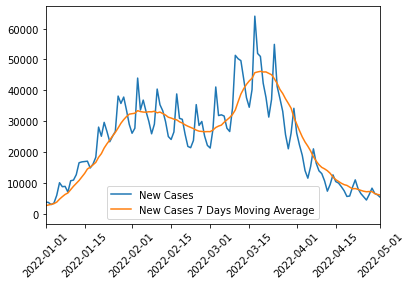

In [37]:
# your code goes here:
cases_rolling = cases_deaths[['date', 'location', 'new_cases']]
cases_rolling['new_cases_7day'] = cases_rolling.groupby('location')['new_cases'].rolling(7).mean().reset_index(drop=True)

fig = plt.figure()
ax = plt.axes()
dates = pd.to_datetime(cases_rolling[cases_rolling['location'] == 'Austria']["date"])
ax.plot(dates, cases_rolling[cases_rolling['location'] == 'Austria']["new_cases"], label="New Cases");
ax.plot(dates, cases_rolling[cases_rolling['location'] == 'Austria']["new_cases_7day"], label="New Cases 7 Days Moving Average");
ax.set_xlim([pd.to_datetime('2022-01-01'),pd.to_datetime('2022-05-01')])
for tick in ax.get_xticklabels(): # Some rotation to make the labels readable
    tick.set_rotation(45)
ax.legend() # add the legend

plt.show()

Do the same for two more locations of your choice using additional subplots. Limit the x-axes to an interval of interest (hint: since the "date" column has a datetime type, you can use strings written as `"YYYY-MM-DD"` to specify the limits - matplotlib will know what to do).

[Help1](https://www.google.com/search?q=matplotlib+subplots), [Help2](https://www.google.com/search?q=matplotlib+x+axis+limits)

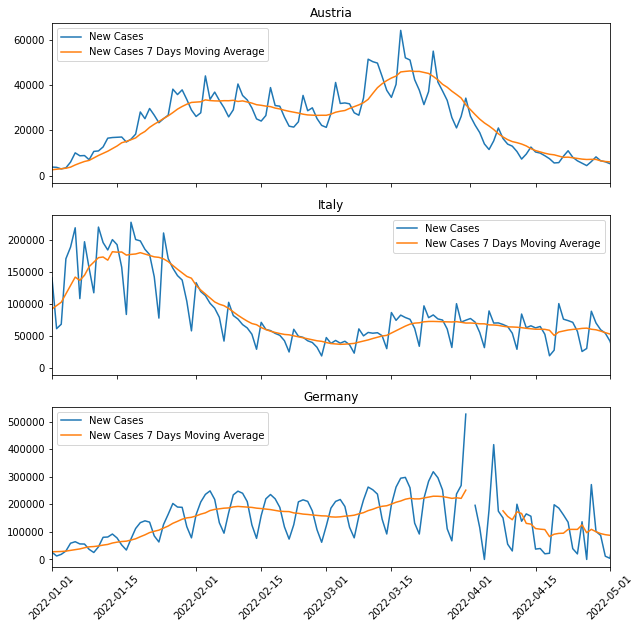

In [38]:
# your code goes here:
cases_rolling = cases_deaths[['date', 'location', 'new_cases']]
cases_rolling['new_cases_7day'] = cases_rolling.groupby('location')['new_cases'].rolling(7).mean().reset_index(drop=True)
locations_of_intersets = ['Austria', 'Italy', 'Germany']
interval_of_interest = [pd.to_datetime('2022-01-01'), pd.to_datetime('2022-05-01')]
# create subplots for each location of interest
fig, axs = plt.subplots(3, 1, figsize=(10,10))
for i, location in enumerate(locations_of_intersets):
    dates = pd.to_datetime(cases_rolling[cases_rolling['location'] == location]["date"])
    axs[i].plot(dates, cases_rolling[cases_rolling['location'] == location]["new_cases"], label="New Cases");
    axs[i].plot(dates, cases_rolling[cases_rolling['location'] == location]["new_cases_7day"], label="New Cases 7 Days Moving Average");
    axs[i].set_xlim(interval_of_interest)
    for tick in axs[i].get_xticklabels(): # Some rotation to make the labels readable
        tick.set_rotation(45)
    axs[i].legend() # add the legend
    axs[i].set_title(location)
    # turn of the x-axis ticks for all but the last subplot
    if i < len(locations_of_intersets) - 1:
        axs[i].set_xticklabels([])

plt.show()

Create a histogram of the populations for all locations in Africa. Adjust the bin size to something you think makes sense.

[Help](https://www.google.com/search?q=matplotlib+histogram)

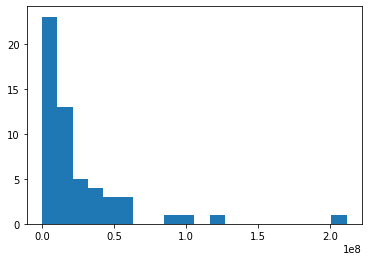

In [39]:
# your code goes here:
# TODO: matplotlib solution
fig = plt.figure()
ax = plt.axes()
ax.hist(locations[locations['continent'] == 'Africa']['population'], bins=20)
plt.show()

Create a scatter plot showing the number of deaths vs. the number of cases (both relative to the population), in January 2022, for all locations. Color-code the dots based on the associated continent, show a legend explaining the colors, and scale both axes logarithmically.

[Help1](https://www.google.com/search?q=matplotlib+scatter+plot), [Help2](https://www.google.com/search?q=matplotlib+scatter+marker+colors), [Help3](https://www.google.com/search?q=matplotlib+legend), [Help4](https://www.google.com/search?q=matplotlib+scatter+log+scale)

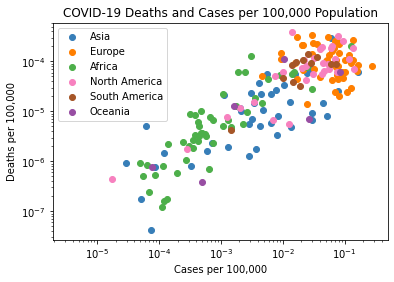

In [44]:
# your code goes here:
# TODO: matplotlib solution

COLORS = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3']

start = "2022-01-01"
end = "2022-01-31"

colors = {continent: color for continent, color in zip(locations["continent"].unique(), COLORS)}

cases_jan22 = cases_deaths.set_index("date")[start:end].groupby("location").agg(cases_jan=("new_cases", sum), deaths_jan=("new_deaths", sum))
cases_jan22 = cases_jan22.merge(locations, on='location')
cases_jan22["cases_jan_pp"] = cases_jan22["cases_jan"] / cases_jan22["population"]
cases_jan22["deaths_jan_pp"] = cases_jan22["deaths_jan"] / cases_jan22["population"]

fig = plt.figure()
ax = plt.axes()
# create a scatter plot for each location
for continent, color in colors.items():
    ax.scatter(cases_jan22[cases_jan22["continent"] == continent]["cases_jan_pp"], cases_jan22[cases_jan22["continent"] == continent]["deaths_jan_pp"], label=continent, color=color)
    # make axis logarithmic
    ax.set_xscale("log")
    ax.set_yscale("log")
    # set axis labels
    ax.set_xlabel("Cases per 100,000")
    ax.set_ylabel("Deaths per 100,000")

# add legend
ax.legend()
# add title
ax.set_title("COVID-19 Deaths and Cases per 100,000 Population")
plt.show()
